<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema: Camino más Corto

**Entrada:** Grafo dirigido $G = (V,E)$ donde cada arco $e$ tiene un valor real asociado $l_e$, y un vértice fuente $s \in V$.

**Salida:** Una de 2 opciones:

  1. Arreglo $dist(s,v)$ de distancias más cortas desde la fuente $s$ hasta todo vértice $v \in V$.
  2. Un retorno que indique si el grafo tiene un ciclo negativo.

El problema del camino más corto, como indica su nombre, se trata de encontrar las rutas más cortas o baratas entre un vértice origen y los demás vertices del grafo. Sin embargo, si bien el ejemplo más obvio es aplicarlo a un mapa físico donde las distancias son siempre positivas, es posible que se necesite usar en un grafo más abstracto donde los arcos pueden tener valores negativos.

Esto genera un problema. Si en uno de estos grafos se forma un ciclo con costo negativo, entonces un algorítmo mal aplicado diría que el camino más corto entre dos vértices es el que se da vueltas en ese ciclo negativo, llevando la distancia al infinito negativo.

Es por eso que el Algoritmo Bellman-Ford está diseñado para detectar y evitar esta posibilidad en la búsqueda de el camino más corto. Otros algoritmos como el de Dijkstra solo pueden utilizar cuando los arcos tienen valores positivos.

El algoritmo Bellman-Ford es un ejemplo de programación dinámica con enfoque Bottom-Up.

##1.1 Subestructura óptima.

Digamos que la ruta más corta $P$ entre el nodo origen $s$ y el nodo $v$ tienen $i$ arcos. Esta ruta la podríamos calcular calculando primero la ruta $P'$ que va de $s$ a $w$ con $i-1$ arcos, más el arco que va de $w$ a $v$ (asumiendo que existe).

De ahí surge la subestructura óptima: primero se resuelve la distancia mínima de los nodos conectados al origen por 1 arco, luego por 2 arcos, y así hasta el máximo número posible de arcos en una ruta, la cual es $n-1$

#2. Algoritmo de Bellman-Ford

##2.1 Código

[(0, 3, 65), (0, 4, 87), (0, 3, 35), (5, 0, 9), (5, 6, 94), (3, 6, -12), (2, 0, 33), (2, 3, -11), (1, 3, 90), (1, 5, 0), (4, 6, 45), (5, 2, 47), (4, 1, 46)]
0
[0, 133, 180, 35, 87, 133, 23]


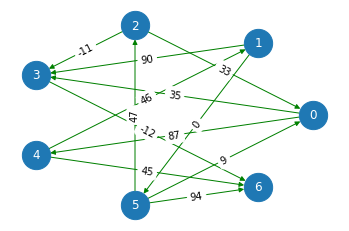

In [18]:

import random
import networkx as nx

MAXINT = 100000

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int, min: int, max: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))
        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(min, max))
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number
                if iterations >= 250:
                    return instance_generator(n)
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(min, max))  
            graph.append(edge_with_weight)
            generated_edges[edge] = edge
            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])
    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(min, max)) 
                graph.append(edge_with_weight)
                generated_edges[edge] = edge
        if iterations >= 250:
            return instance_generator(n)
    return graph, graph[0][0]

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

def getNodos(graph):
  nodos ={}
  for i in graph:
    nodos[i[0]] = i[0];
    nodos[i[1]] = i[1];
  return nodos

def BellmanFord(graph: list, s: int, visualize = False, verbose = False):
  global MAXINT
  x = len(getNodos(graph))
  if visualize:
    G = graph_to_nxdigraph(graph,x)
    labels = nx.get_edge_attributes(G,'weight')
    pos=nx.circular_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10)
    nx.draw(G,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="green")
  Dist = [MAXINT for i in range(x)]
  Dist[s] = 0
  if verbose: print("Distancias iniciales:", Dist)
  for i in range(x):
    if verbose: print("iteracion numero", i)
    for edge in graph:

      if Dist[edge[1]] > Dist[edge[0]] + edge[2]:
        Dist[edge[1]] = Dist[edge[0]] + edge[2]
    if verbose: print("Distancias actuales:", Dist)
  for edge in graph:
    if verbose: print("Chequeando resultados finales...")
    if Dist[edge[1]] > Dist[edge[0]] + edge[2]:
      print("Existe un ciclo negativo.")
      return []
  return Dist

G,v = instance_generator(7, -25, 100)

result = BellmanFord(G,v,True)

print(G)
print(v)
print(result)

##2.2 Descripción del algoritmo
El algoritmo recibe un grafo dirigido `graph` en forma de lista de arcos, con cada arco una lista de 3 elementos: nodo origen, nodo destino, y valor de arco. También recibe un índice `s` que indica el nodo origen.

1. Primero, se cuenta la cantidad de nodos en el grafo y se crea el arreglo `Dist` que almacena la distancia a cada nodo, asignándole a todos una distancia máxima definida por `MAXINT`, excepto al nodo origen, el cual tendrá una distancia `0`.

2. Ya que el máximo número de arcos que puede tener un camino más corto entre el nodo origen y un nodo cualquiera es $n-1$, se entra en un for loop que itera $n$ veces.

3. En cada una de estas iteraciones, hay un for loop anidado, que recorre el arreglo de arcos y los 'relaja', asignando nuevas distancias a los nodos según la siguiente regla:
    
    Considerando un arco $E(u,v,l)$ que va de $u$ a $v$ distintos a $s$, con peso $l$. Si la distancia $Dist[v]$ es mayor a $Dist[u] + l$, entonces esta última es asignada como la nueva $Dist[v]$.

    Al principio, los únicos arcos relajados son los que conectan con el origen. con cada iteración, el grafo se va alcanzando, hasta que, con algo de suerte, se tenga una distancia no máxima para cada nodo del grafo (lo cual indica que es un grafo conexo).

4. Antes de retornar el arreglo de distancias, se intenta relajar los arcos una vez más. Si no hay ciclos negativos, entonces los resultados no deberían cambiar; luego de iterar $n$ veces, las distancias deben ser mínimas. Sin embargo, si hay un cambio en las distancias y se encuentra un camino más corto, entonces esto significa que hay un ciclo negativo, el cual seguirá disminuyendo las distancias hasta el infinito negativo. En ese caso, se imprime que se detecto un ciclo negativo y se retorna un arreglo vacío.

5. Si lo anterior no detecta ciclo negativo, entonces se retorna el arreglo `Dist`.

##2.3 Ejecución paso a paso (`verbose = True`)

Distancias iniciales: [100000, 100000, 100000, 0, 100000]
iteracion numero 0
Distancias actuales: [-11, -34, -28, -45, -40]
iteracion numero 1
Distancias actuales: [-56, -79, -73, -90, -85]
iteracion numero 2
Distancias actuales: [-101, -124, -118, -135, -130]
iteracion numero 3
Distancias actuales: [-146, -169, -163, -180, -175]
iteracion numero 4
Distancias actuales: [-191, -214, -208, -225, -220]
Chequeando resultados finales...
Existe un ciclo negativo.
[(3, 0, -11), (3, 4, 19), (0, 4, 24), (0, 1, -23), (2, 1, 7), (1, 4, -6), (1, 3, -11), (4, 2, 12)]
3
[]


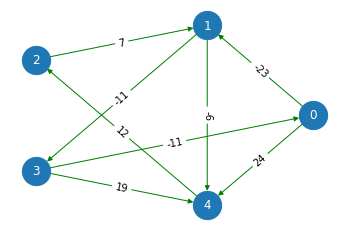

In [19]:
G,v = instance_generator(5, -25, 25)

result = BellmanFord(G,v,True,True)

print(G)
print(v)
print(result)

En este caso se puede ver como, cuando hay un ciclo negativo, los resultados van siendo cada vez más negativos luego de cada iteración.

#3. Algoritmo de Dijkstra
A continuación implementaremos el algoritmo de Dijkstra, el cual solo funciona cuando no pueden haber ciclos negativos.

[(0, 3, 69), (0, 4, 43), (0, 2, 42), (4, 2, 35), (4, 3, 99), (3, 2, 8), (3, 1, 80), (3, 1, 34), (2, 1, 84), (1, 4, 40), (1, 0, 39)]
0
[0, 103, 42, 69, 43]


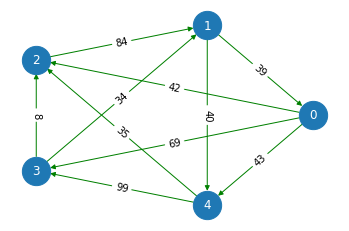

In [24]:

def Dijkstra(graph: list, s: int, visualize=False):
  global MAXINT
  nodos = getNodos(graph)
  x = len(nodos)
  if visualize:
    G = graph_to_nxdigraph(graph,x)
    labels = nx.get_edge_attributes(G,'weight')
    pos=nx.circular_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10)
    nx.draw(G,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="green")
  arcos = [([0]*x) for i in range(x)]
  for edge in graph: 
    arcos[edge[0]][edge[1]]=edge[2]
  dist =[MAXINT]*x
  dist[s]=0
  visitados = [False]*x
  for z in range(x):
    nodo = minimumNode(dist,visitados)
    visitados[nodo] = True
    for i in range(x):
      if arcos[nodo][i] > 0 and visitados[i] == False and dist[i] > dist[nodo] + arcos[nodo][i]:
        dist[i] = dist[nodo] + arcos[nodo][i]
  return dist

def minimumNode(dist, visitados):
  x = len(dist)
  global MAXINT
  min = MAXINT
  nodo = -1
  for i in range(x):
    if dist[i] < min and visitados[i]==False:
      min = dist[i]
      nodo = i
  return nodo


G,v = instance_generator(5, 1, 100)

result = Dijkstra(G,v,True)

print(G)
print(v)
print(result)